# Eigenvector와 Eigenvalue를 활용한 PCA 예시
다음과 같은 3차원 데이터셋이 있다고 가정해보겠습니다. 이 데이터셋은 3개의 특성(feature)을 가지는 50개의 샘플(sample)로 구성되어 있습니다.

In [23]:
import numpy as np

# 3차원 데이터셋 (50 x 3)
X = np.random.randn(50, 3)
print(f"샘플) X[:5]: {X[:5]}")


샘플) X[:5]: [[-1.05972015 -0.87586436  0.39186562]
 [-0.3842238  -2.42856111  0.13301577]
 [-1.16993285 -1.13603941 -0.98881077]
 [ 1.47463104  1.72301311  1.52158802]
 [-0.12913024  1.07254923 -0.10847643]]


이 데이터셋을 표준화(standardization)하여 모든 특성이 평균 0, 분산 1을 가지도록 만들어줍니다.

In [24]:
# 표준화
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(f"샘플) X[:5]: {X[:5]}")


샘플) X[:5]: [[-1.0885339  -0.82085485  0.39026489]
 [-0.4970428  -2.25164449  0.08589564]
 [-1.18504046 -1.06060274 -1.23320691]
 [ 1.13064341  1.57397656  1.71865181]
 [-0.27367287  0.97458265 -0.19806357]]


이제, Eigenvalue와 Eigenvector를 계산하여 PCA를 수행해보겠습니다. 이를 위해 다음과 같은 코드를 사용합니다.

In [25]:
# 공분산 행렬 계산
covariance_matrix = np.cov(X.T)

# Eigenvalue와 Eigenvector 계산
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 주성분(PC) 개수 설정
n_components = 2

# 주성분(PC) 추출
components = eigenvectors[:, :n_components]

# 새로운 차원으로 변환
X_pca = np.dot(X, components)


위 코드에서, np.cov 함수를 사용하여 데이터셋의 공분산 행렬을 계산합니다. 이후, np.linalg.eig 함수를 사용하여 공분산 행렬의 Eigenvalue와 Eigenvector를 계산합니다. 이때, Eigenvalue는 eigenvectors 배열의 대각선에 위치한 값으로 저장되며, Eigenvector는 eigenvectors 배열의 각 열에 위치한 값으로 저장됩니다.

PCA를 수행할 때는, 축소할 주성분(PC)의 개수를 설정해야 합니다. 위 코드에서는 n_components 변수를 사용하여 주성분의 개수를 2로 설정하였습니다. 이후, components 변수에는 계산된 Eigenvector 중 상위 n_components개를 저장합니다.

마지막으로, 새로운 차원으로 변환된 데이터셋 X_pca를 얻기 위해, 원래 데이터셋 X와 components를 행렬곱(np.dot)하여 곱셈 결과를 저장합니다.

이렇게 PCA를 수행하여 데이터셋을 축소한 결과, 3차원 데이터셋이 2차원으로 축소되었습니다. 이를 시각적으로 표현하면 다음과 같습니다.

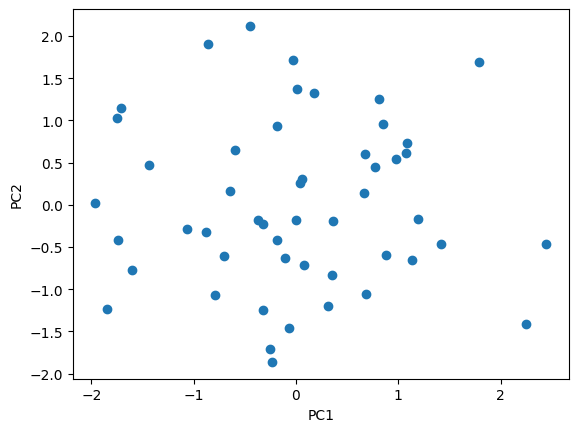

In [26]:
import matplotlib.pyplot as plt

# 2차원 PCA 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## digits 데이터셋에 대한 PCA 예시
다음은 scikit-learn 라이브러리에서 제공하는 digits 데이터셋을 사용한 예시입니다. 이 데이터셋은 0부터 9까지의 손글씨 이미지 데이터셋으로, 총 1797개의 이미지 데이터가 있습니다. 각 이미지 데이터는 8x8 크기의 픽셀로 구성되어 있습니다. 이 데이터셋을 이용하여 PCA를 수행하고, 그 결과를 시각화해보겠습니다.

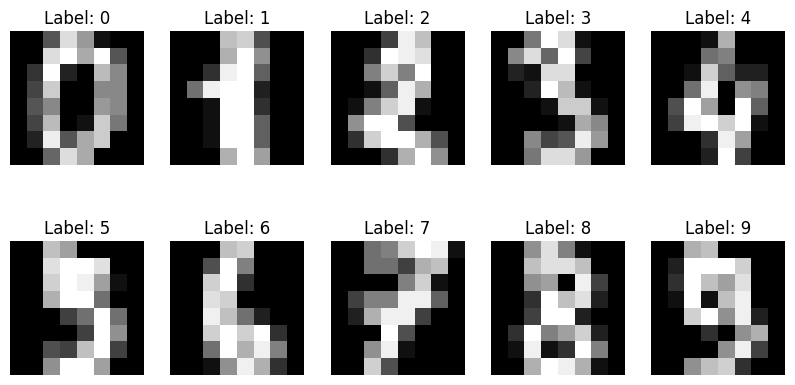

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# digits 데이터셋 로드
digits = datasets.load_digits()

# 10개의 이미지 랜덤 선택 및 시각화
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        k = i * 5 + j
        ax[i, j].imshow(digits.images[k], cmap='gray')
        ax[i, j].set_title(f"Label: {digits.target[k]}")
        ax[i, j].axis('off')
plt.show()

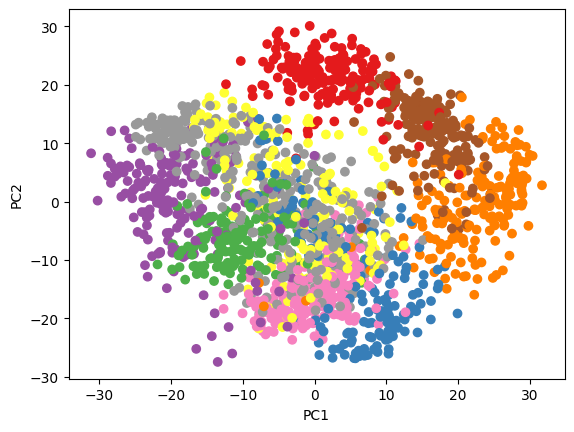

In [35]:

# 데이터셋 분리
X = digits.data
y = digits.target

# PCA 수행
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


PCA를 적용한 각각의 데이터도 이미지로 시각화할 수 있습니다. 다만, PCA를 적용하면 원래 데이터가 8x8 크기의 이미지에서 차원 축소되어 2차원 데이터로 변환되기 때문에, 시각화 결과는 숫자 형태가 아니라 산점도 형태로 나타납니다.

다음은 digits 데이터셋에 PCA를 적용하고, 변환된 2차원 데이터를 이미지로 시각화하는 예시 코드입니다.

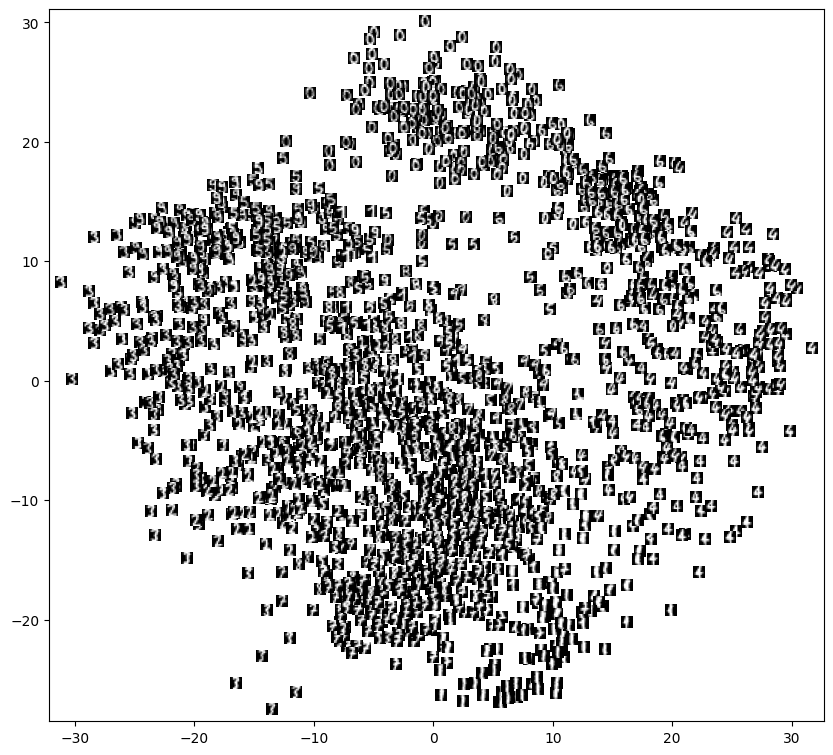

In [36]:
# 변환된 2차원 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(digits.images)):
    image_coord = X_pca[i]
    image = digits.images[i]
    ax.imshow(image, cmap='gray', extent=(
        image_coord[0] - 0.5, image_coord[0] + 0.5,
        image_coord[1] - 0.5, image_coord[1] + 0.5))
    ax.set_xlim([X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1])
    ax.set_ylim([X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1])
    ax.set_aspect('equal')
plt.show()

위 코드에서, digits 데이터셋을 불러와 X에는 이미지 데이터, y에는 각 이미지에 대한 레이블 정보를 저장합니다. 이후, PCA를 수행하고, 주성분(PC)의 개수를 2로 설정하여 2차원 공간으로 축소합니다. 이렇게 축소된 데이터를 scatter plot으로 시각화합니다. 이때, 각 데이터 포인트의 색상은 해당 이미지의 레이블 정보를 나타냅니다.   

위 그래프에서 볼 수 있듯이, PCA를 통해 64차원 이미지 데이터셋을 2차원으로 축소한 결과, 각 숫자 이미지들이 서로 다른 영역에 잘 분포되어 있는 것을 확인할 수 있습니다. 이를 통해, PCA를 사용하여 차원을 축소하면 데이터를 시각화하거나, 분류 등의 작업을 수행할 때 유용하게 사용할 수 있음을 알 수 있습니다.


### PCA 조금 더 살펴보기

PCA에서 `n_components=2`로 설정하면, 64차원의 이미지 데이터셋에서 주성분(PC) 2개로 차원을 축소합니다. 이는 2개의 새로운 축을 생성하고, 각 이미지 데이터를 이 새로운 축으로 투영한 결과를 나타내게 됩니다. 따라서, 주성분 2개를 제외한 나머지 62개의 차원에 대한 데이터는 무시됩니다.

PCA를 수행하는 과정에서, 각 주성분의 계수를 나타내는 eigenvector가 생성됩니다. 이 eigenvector는 원본 데이터셋의 차원과 같은 크기를 가지며, 이 벡터를 사용하여 데이터를 새로운 축으로 투영합니다. 따라서, 위 예시에서 64차원 데이터셋의 경우, 64개의 eigenvector가 생성됩니다.

이를 행렬 계산식으로 나타내면 다음과 같습니다. 우선, 원본 데이터셋을 `X`라 하고, `X`의 공분산 행렬을 `C`라고 합니다.

In [30]:
C = np.cov(X.T)


이후, `C`의 eigenvalue와 eigenvector를 계산합니다.

In [31]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues[:5]) # sorting되서 나옴


[179.0069301  163.71774688 141.78843909 101.1003752   69.51316559]


이때, eigenvalues는 C의 주성분(PC)의 중요도를 나타내는 값이고, eigenvectors는 C의 주성분(PC)을 나타내는 벡터입니다. eigenvectors의 각 열이 주성분(PC)을 나타내므로, 이 벡터 중 n_components개의 열만 선택하여 새로운 eigenvector 행렬 `E`를 생성합니다.

In [32]:
E = eigenvectors[:, :n_components]


이후, `X`를 `E`로 곱하여 새로운 축으로 투영한 결과인 X_pca를 계산합니다.

In [33]:
X_pca = X.dot(E)


위 과정을 수행하면, X_pca는 n_components개의 열을 가지는 새로운 데이터셋이 생성됩니다. 이때, n_components개의 열을 제외한 나머지 열은 무시됩니다.